In [1]:
%matplotlib inline
import sys
sys.path.append("../../")
from QUEEN.queen import *
feat_labels = ["loxP","lox2272","FRT","TagBFP","EGFP","iRFP720","mRuby2","bGHpA"]
colors      = [('#ffffcc', '#d9d927'), ('#e5d8bd', '#a65628'), ('#fddaec', '#f781bf'),
               ('#92c6ff', '#4c72b0'), ('#97f0aa', '#55a868'), ('#ff9f9a', '#c44e52'), 
               ('#d0bbff', '#8172b2'), ('#f2f2f2', '#999999')]

In [2]:
decoder = cropdna(QUEEN(record="input/addgene_87551.gbk"),2794, 7407, project="2-input 4-output decoder")
for color_pair, label in zip(colors, feat_labels):
    editfeature(decoder, key_attribute="qualifier:label", query=label, target_attribute="qualifier:facecolor_dna.py", operation=createattribute(color_pair[0]), new_copy=False)
    editfeature(decoder, key_attribute="qualifier:label", query=label, target_attribute="qualifier:edgecolor_dna.py", operation=createattribute(color_pair[1]), new_copy=False)

[DNAfeature(FeatureLocation(ExactPosition(2280), ExactPosition(2314), strand=1), type='protein_bind'), DNAfeature(FeatureLocation(ExactPosition(3625), ExactPosition(3659), strand=1), type='protein_bind'), DNAfeature(FeatureLocation(ExactPosition(35), ExactPosition(69), strand=1), type='protein_bind'), DNAfeature(FeatureLocation(ExactPosition(1131), ExactPosition(1165), strand=1), type='protein_bind'), DNAfeature(FeatureLocation(ExactPosition(0), ExactPosition(34), strand=1), type='protein_bind'), DNAfeature(FeatureLocation(ExactPosition(2245), ExactPosition(2279), strand=1), type='protein_bind'), DNAfeature(FeatureLocation(ExactPosition(84), ExactPosition(786), strand=1), type='CDS'), DNAfeature(FeatureLocation(ExactPosition(1180), ExactPosition(1900), strand=1), type='CDS'), DNAfeature(FeatureLocation(ExactPosition(1225), ExactPosition(1247), strand=-1), type='primer_bind'), DNAfeature(FeatureLocation(ExactPosition(1833), ExactPosition(1855), strand=1), type='primer_bind'), DNAfeature

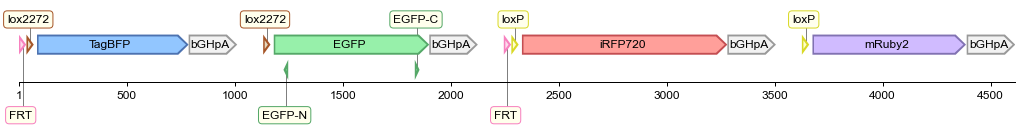

In [4]:
features = sum([decoder.searchfeature(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(decoder, feature_list=features, standard_scale=4000, label_location='both', tick_space=500, view_title=False)
fig.savefig("output/decoder.pdf", bbox_inches="tight")

Simulation1: Cre input -> Flp input

In [4]:
process1      = "Process1: Cre-loxP recombination"
loxP          = "ATAACTTCGTATA^ATGTATGC_TATACGAAGTTAT"
loxP_sites    = decoder.searchdna(loxP, key_attribute="sequence", process_description=process1)
fragments     = cutdna(decoder, *loxP_sites, process_description=process1)
dc_loxP       = joindna(fragments[0], fragments[2])

In [5]:
process2      = "Process2: Cre-lox2272 recombination"
lox2272       = "ATAACTTCGTATA^AAGTATCC_TATACGAAGTTAT"
lox2272_sites = dc_loxP.searchdna(lox2272, key_attribute="sequence", process_description=process2)
fragments     = cutdna(dc_loxP, *lox2272_sites, process_description=process2)
dc_loxP2272   = joindna(fragments[0], fragments[2])

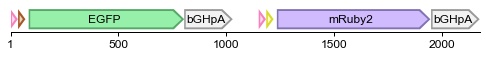

In [6]:
features = sum([dc_loxP2272.searchdna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(dc_loxP2272, feature_list=features, standard_scale=4000, label_location='top', label_box=False, view_title=False)
fig.savefig("output/decoder_loxp_lox2272.pdf", bbox_inches="tight")

In [7]:
process3       = "Process3: Flp-FRT recombination"
FRT            = "GAAGTTCCTATTC^TCTAGAAA_GTATAGGAACTTC"
FRT_sites      = dc_loxP2272.searchdna(FRT, key_attribute="sequence", process_description=process3)
fragments      = cutdna(dc_loxP2272, *FRT_sites, process_description=process3)
dc_loxP2272FRT = joindna(fragments[0], fragments[2])

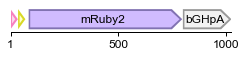

In [8]:
features = sum([dc_loxP2272FRT.searchdna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(dc_loxP2272FRT, feature_list=features, standard_scale=4000, label_location='top', label_box=False, view_title=False)
fig.savefig("output/decoder_loxp_lox2272_FRT.pdf", bbox_inches="tight")

In [9]:
process1  = "Process1: Flp-FRT recombination"
FRT       = "GAAGTTCCTATTC^TCTAGAAA_GTATAGGAACTTC"
FRT_sites = decoder.searchdna(FRT, key_attribute="sequence", process_description=process1)
fragments = cutdna(decoder, *FRT_sites, process_description=process1)
dc_FRT    = joindna(fragments[0], fragments[2])

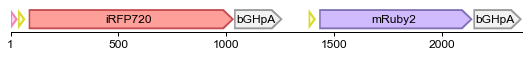

In [10]:
features = sum([dc_FRT.searchdna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(dc_FRT, feature_list=features, standard_scale=4000, label_location='top', label_box=False, view_title=False)
fig.savefig("output/decoder_FRT.pdf", bbox_inches="tight")

In [11]:
process2    = "Process2: Cre-loxP recombination"
loxP        = "ATAACTTCGTATA^ATGTATGC_TATACGAAGTTAT"
loxP_sites  = dc_FRT.searchdna(loxP, key_attribute="sequence", process_description=process2)
fragments   = cutdna(dc_FRT, *loxP_sites, process_description=process2)
dc_FRTloxP  = joindna(fragments[0], fragments[2])

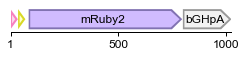

In [12]:
features = sum([dc_FRTloxP.searchdna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(dc_FRTloxP, feature_list=features, standard_scale=4000, label_location='top', label_box=False, view_title=False)
fig.savefig("output/decoder_FRT_loxP.pdf", bbox_inches="tight")

In [13]:
quine(dc_FRTloxP, description_only=True)

Process1: Flp-FRT recombination
Process2: Cre-loxP recombination


In [14]:
quine(dc_loxP2272FRT, description_only=True)

Process1: Cre-loxP recombination
Process2: Cre-lox2272 recombination
Process3: Flp-FRT recombination
